In [536]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
np.random.seed(0)

<h2> K-Means

<h3>A. K-Means algorithm splits a dataset X ∈ {x1 , . . . , xN } into K many partitions, where each Xk ⊆ X ∀k ∈ {1, . . . , K}. Clustering algorithms like the K-Means is a useful technique when the true labels are unknown. Or in other words, we are basically interested in analyzing patterns within the data and make useful inferences.
In this task, you will implement a K-Means algorithm from scratch using the dataset ”HTRU 2.csv”. The dataset contains 8 continuous variables describing a pulsar candidate1. The task is to identify multiple (K) clusters that might best describe the classes within the data. Being a simple algorithm, we strongly advise you to implement the algorithm as per the lecture slides.

<h3><span style="color:blue">1. Initialize the cluster centers by selecting the first center at random and the rest sequentially based on the largest sum of distances to the selected cluster center.</span>

<h3><span style="color:blue">2. Run with different random initialization.</span>

In [537]:
X = pd.read_csv('HTRU_2.csv').values

In [538]:
def kmeans(X, K, max_iters=100):
    N,_ = X.shape
    # Initialize the cluster centers
    initial_centers = X[np.random.choice(N, K, replace=False), :]
    # Repeat the algorithm until convergence
    for i in range(max_iters):
        # Calculate the distances between each data point and each cluster center
        distances = np.array([np.linalg.norm(X - initial_centers[j], axis=1) for j in range(K)])
        # Assign each data point to the closest cluster center
        clusters = np.argmin(distances, axis=0)
        # Recompute the cluster centers as the mean of all data points assigned to that cluster
        new_centers = np.array([X[clusters == j].mean(axis=0) for j in range(K)])
        # Check for convergence
        if np.allclose(initial_centers, new_centers):
            break
        # Update the cluster centers
        initial_centers = new_centers
        # Calculate the distances between each data point and each cluster center
        distances = np.array([np.linalg.norm(X - initial_centers[j], axis=1) for j in range(K)])
        # Assign each data point to the closest cluster center
        clusters = np.argmin(distances, axis=0)
    # Return the final clusters and cluster centers
    return clusters, initial_centers

<h3><span style="color:blue">3. Plot, a figure showing the selection of the best number of clusters K for each initialization.</span>

In [539]:
def kmeans_wcss(X, K_range):
    wcss = []
    _, axs = plt.subplots(2, int(len(K_range)/2), figsize=(50, 30))
    axs = axs.ravel()
    for i, K in enumerate(K_range):
        cluster_assignments, centers = kmeans(X, K)
        distances = np.array([np.sum((X - centers[j])**2, axis=1) for j in range(K)])
        # wcss.append(np.sum([np.sum(distances[j]) for j in range(K)]))
        wcss.append(np.sum([np.sum(distances[j]) / len(X[cluster_assignments == j]) for j in range(K)]))

        
        plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments)
        plt.title(f'{K} clusters')
        axs[i].scatter(X[:, 0], X[:, 1], c=cluster_assignments)
        axs[i].set_title(f'{K} clusters', fontsize=70)
    finalWcss = wcss[::-1]
    plt.show()
    return finalWcss



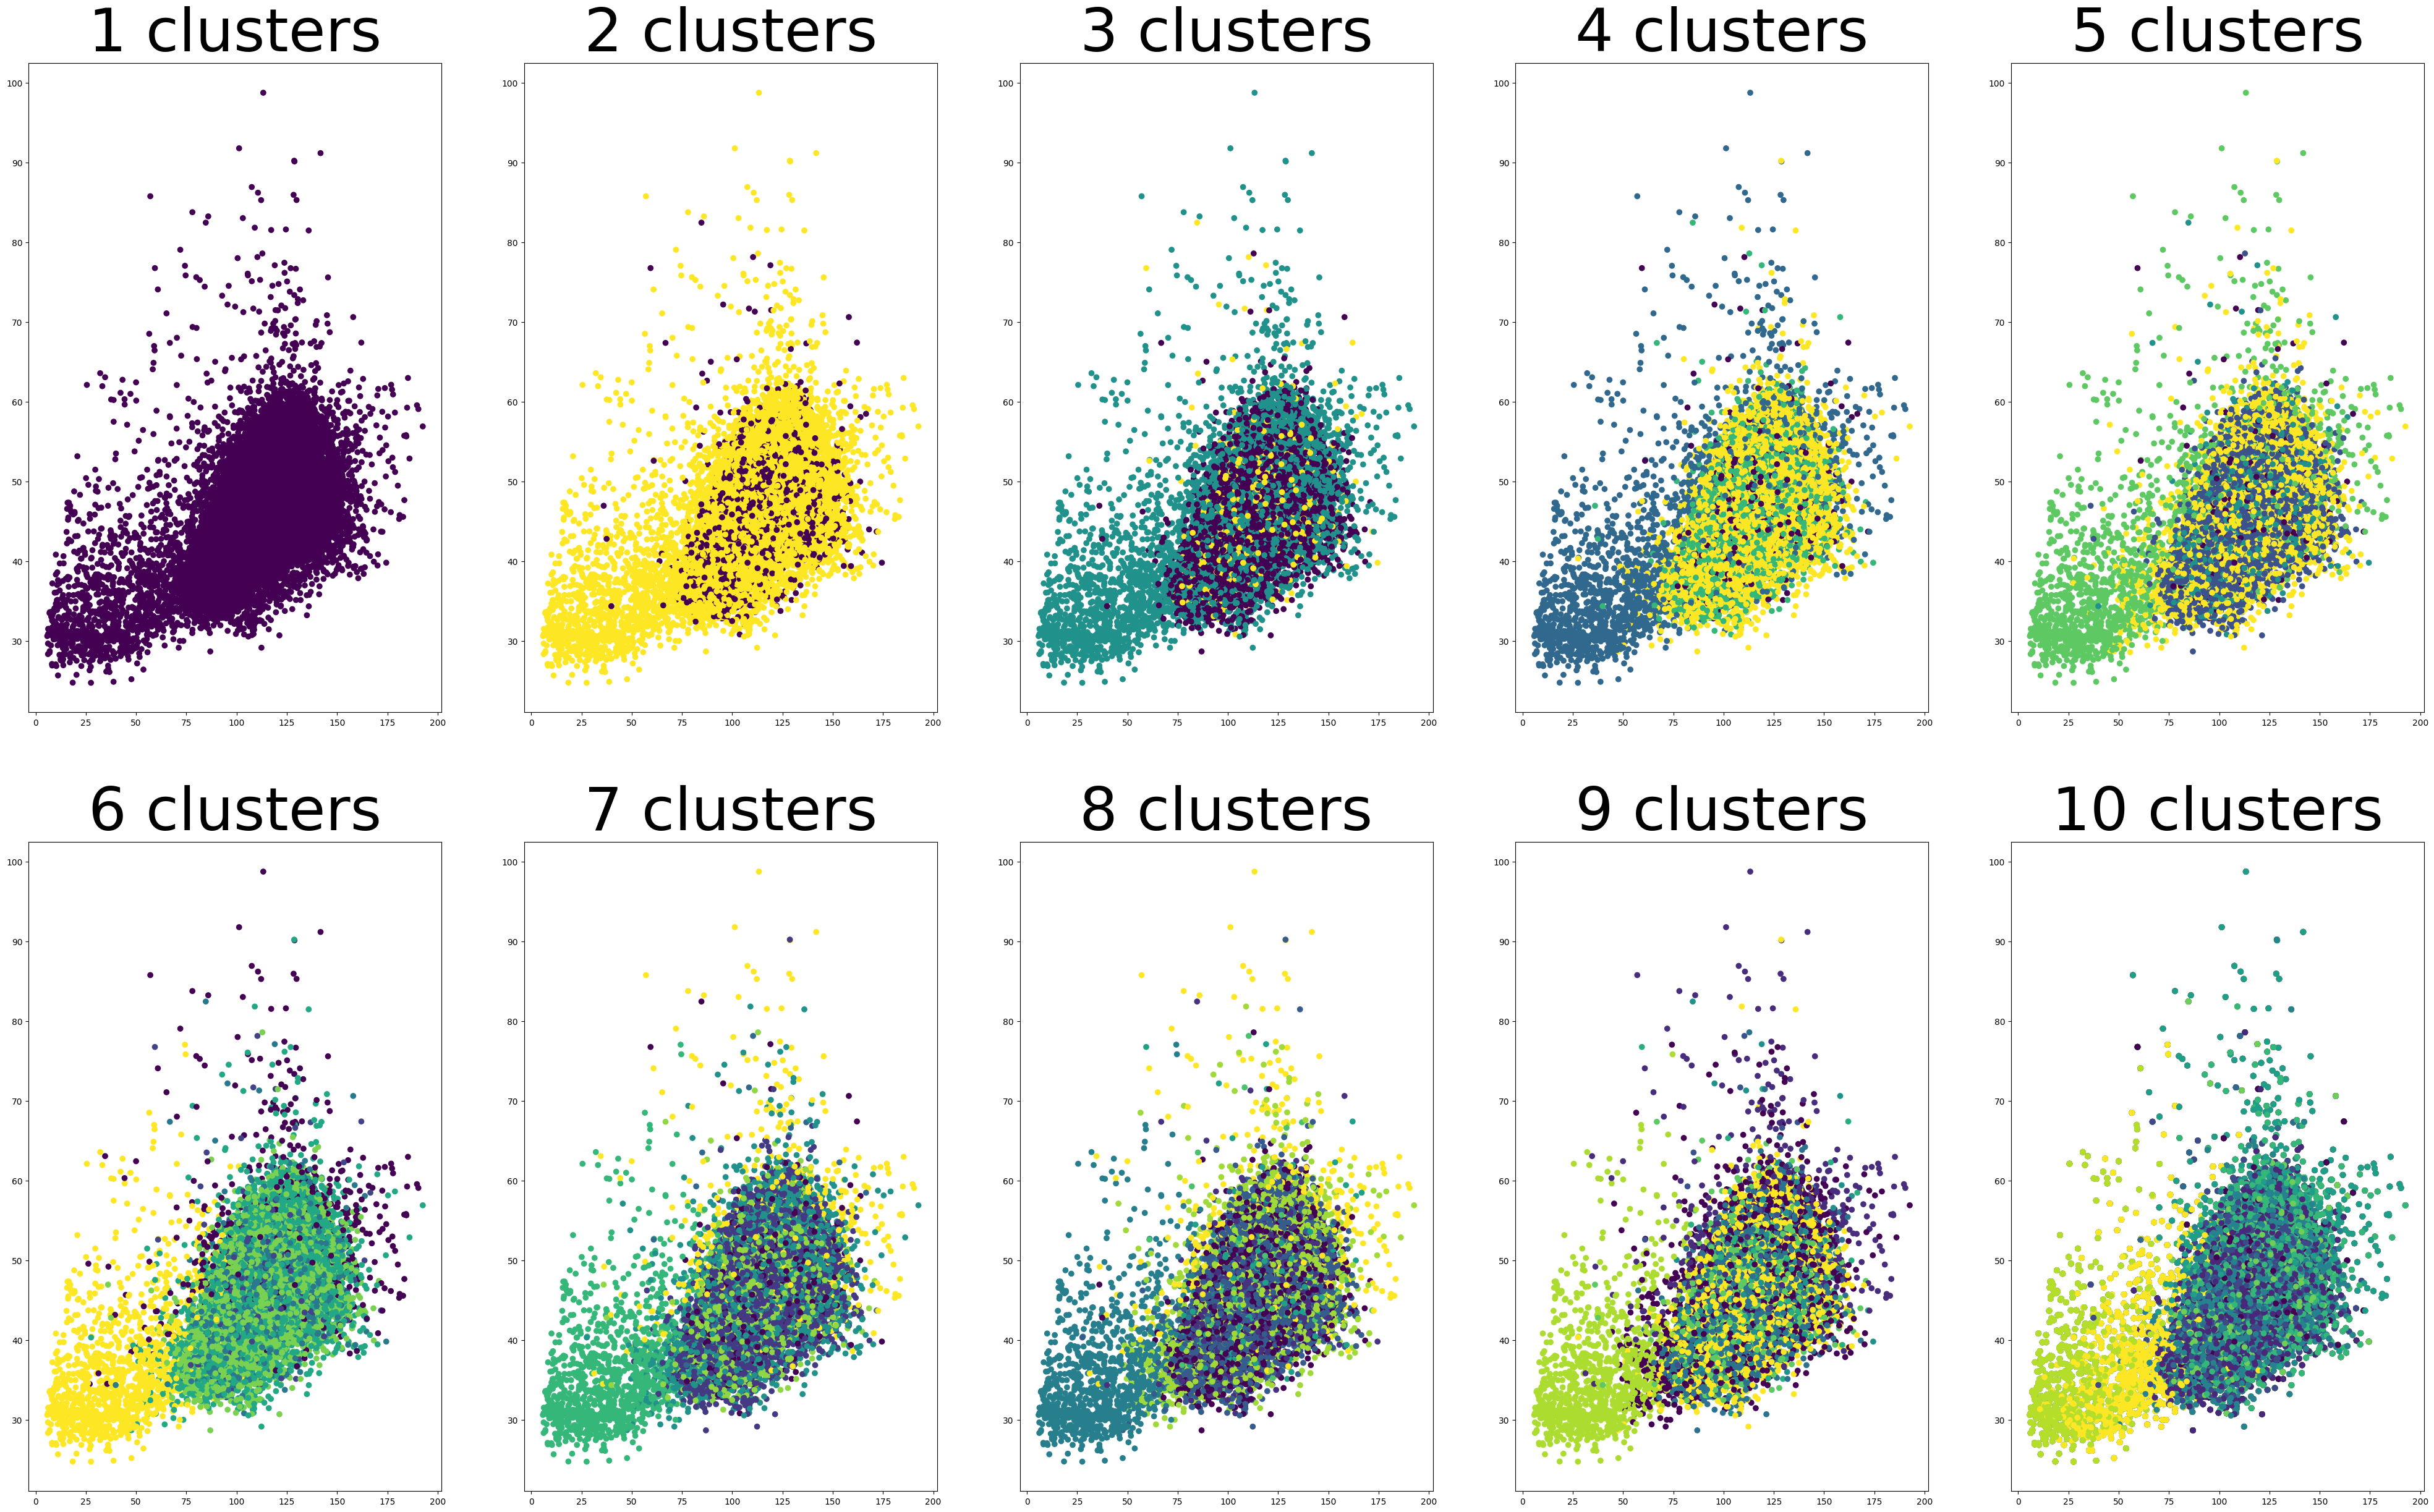

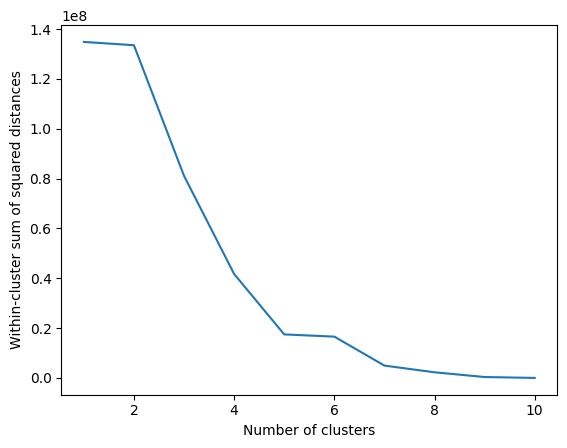

In [540]:
K_range = range(1, 11)
wcss = kmeans_wcss(X, range(1, 11))
plt.plot(K_range, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squared distances')
plt.show()

<h3><span style="color:blue">4. Optimize the algorithm and show runtime improvements.</span>

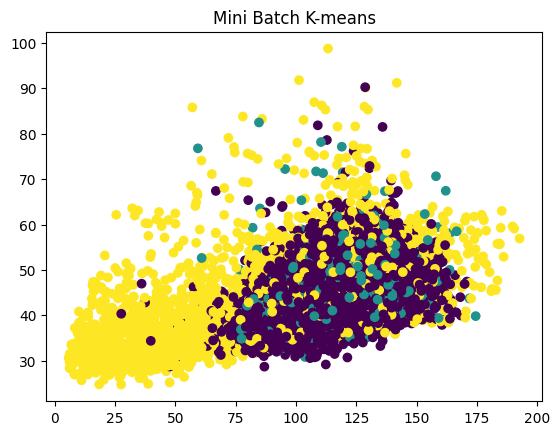


------------------------------------------------

Custom Implementation Run Time:  1.608410120010376

------------------------------------------------



In [541]:
def kmeans_mini_batch(X, K, batch_size=100, max_iters=100):
    N, D = X.shape
    
    for i in range(max_iters):
        # Initialize the cluster centers
        initial_centers = X[np.random.choice(N, K, replace=False), :]
        
        for j in range(0, N, batch_size):
            X_batch = X[j:j + batch_size]
            N_batch = X_batch.shape[0]
            
            # Calculate the distances between each data point and each cluster center
            distances = np.array([np.linalg.norm(X_batch - initial_centers[k], axis=1) for k in range(K)])
            
            # Assign each data point to the closest cluster center
            clusters_batch = np.argmin(distances, axis=0)
            
            # Recompute the cluster centers as the mean of all data points assigned to that cluster
            new_centers = np.array([X_batch[clusters_batch == k].mean(axis=0) for k in range(K)])
            
            # Update the cluster centers
            initial_centers = initial_centers + (new_centers - initial_centers) / (i + 1)
    
    # Calculate the distances between each data point and each cluster center for the full dataset
    distances = np.array([np.linalg.norm(X - initial_centers[k], axis=1) for k in range(K)])
    
    # Assign each data point to the closest cluster center for the full dataset
    clusters = np.argmin(distances, axis=0)
    
    plt.scatter(X[:, 0], X[:, 1], c=clusters)
    plt.title('Mini Batch K-means')
    plt.show()
        
    # Return the final clusters and cluster centers
    return clusters, initial_centers



# Your implementation
start = time.time()
clusters, centers = kmeans_mini_batch(X, K=3)
print('\n------------------------------------------------\n')
print("Custom Implementation Run Time: ", time.time() - start)
print('\n------------------------------------------------\n')

<h3><span style="color:blue">Try to compare your results (cluster centers, loss/distortion) and runtime to the sklearn implementation of KMeans clustering algorithm for the same dataset.</span>

In [542]:
# Scikit-learn implementation
start = time.time()
kmeans = KMeans(n_clusters=3).fit(X)
sk_clusters = kmeans.labels_
sk_centers = kmeans.cluster_centers_
print('\n------------------------------------------------\n')
print("SKlearn Implementation Run Time: ", time.time() - start)
# Compare the results
print('\n------------------------------------------------\n')
print("Difference in cluster centers: ", np.abs(centers - sk_centers).mean())
print("Difference in cluster assignments: ", np.abs(clusters - sk_clusters).mean())
print('\n------------------------------------------------\n')



------------------------------------------------

SKlearn Implementation Run Time:  0.3834350109100342

------------------------------------------------

Difference in cluster centers:  41.41505755505797
Difference in cluster assignments:  0.9147390769918426

------------------------------------------------



<h3><span style="color:blue">B. Principal Components Analysis (PCA) is a widely used method for reducing the number of dimensions to a low dimensional representation of the data. (You are allowed to use numpy.linalg.svd for single value decomposition). Use PCA to reduce the dimensionality of the data and represent the clusters (from the K-Means) in a 2D or 3D graph.</span>

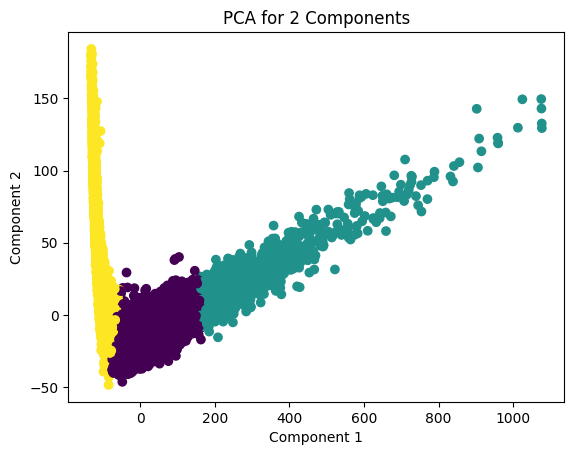

In [543]:
# Perform PCA on the data
X_center = X - X.mean(axis=0)
U, S, VT = np.linalg.svd(X_center, full_matrices=False)
X_pca = np.dot(X_center, VT.T[:, :2])
# Plot the results in 2D
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('PCA for 2 Components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

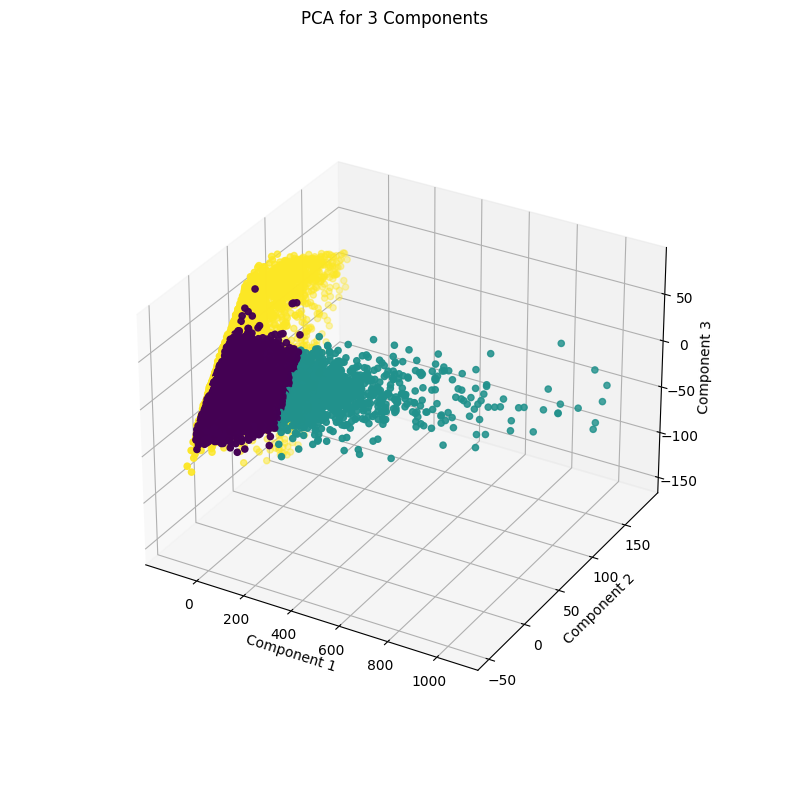

In [544]:
X_pca = np.dot(X_center, VT.T[:, :3])
# Plot the results in 3D (if desired)
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.dist = 13
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='viridis')
ax.set_title('PCA for 3 Components')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()

<h3><span style="color:blue">Compare your results with sklearn implementation of PCA.</span>

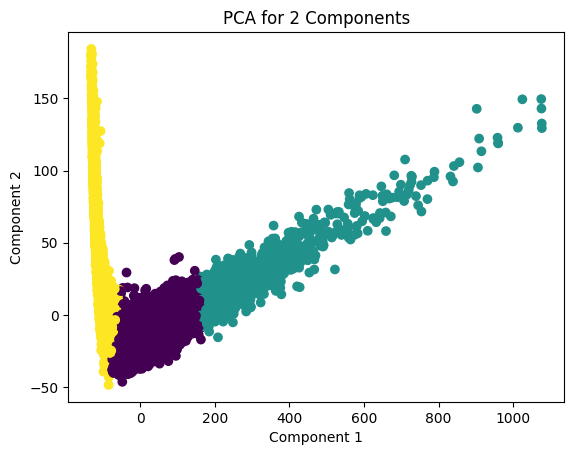

In [545]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_center)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
ax.set_title('PCA for 2 Components')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
plt.show()


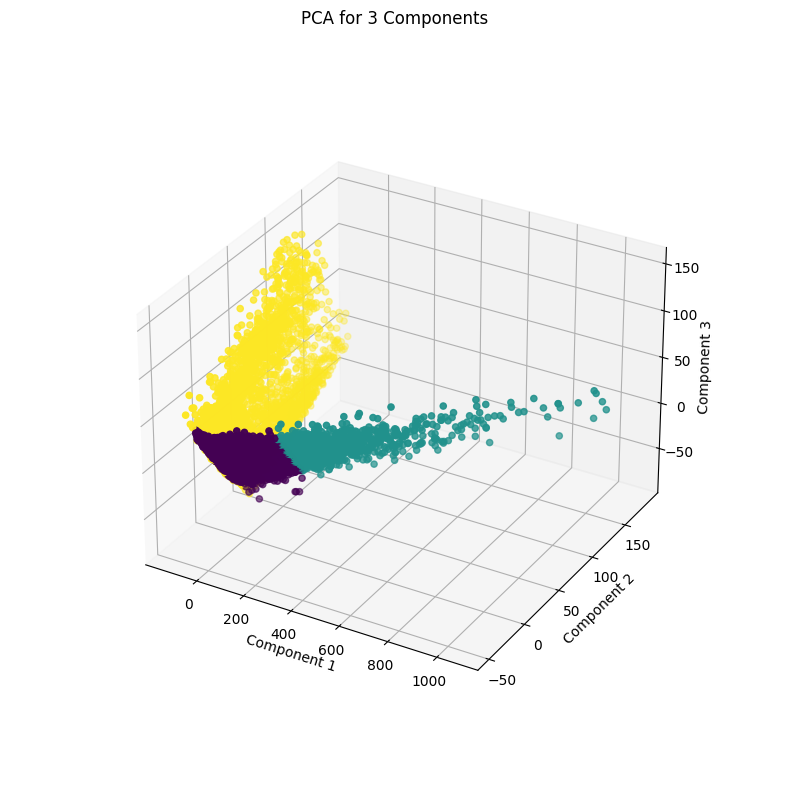

In [546]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_center)
# Plot the results in 3D (if desired)
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.dist = 13
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='viridis')
ax.set_title('PCA for 3 Components')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()

In [547]:
# Compare results with scikit-learn implementation
print('\n------------------------------------------------\n')
print("Explained variance ratio (scikit-learn):", pca.explained_variance_ratio_)
print("Singular values (scikit-learn):", pca.singular_values_)
print('\n------------------------------------------------\n')


------------------------------------------------

Explained variance ratio (scikit-learn): [0.87105304 0.07819344 0.04115623]
Singular values (scikit-learn): [14430.28004546  4323.5214088   3136.68022725]

------------------------------------------------

